# Avaliação 02 - Automação Inteligente
___

**Autor:** Miguel Marques Ferreira

**GitHub**: [https://github.com/Miguel-mmf](https://github.com/Miguel-mmf)

## Parte 1
___
Implementação do trabalho [Fuzzy Logic Simulations for a Smart Air Conditioning System](./9128c270-6c01-4711-a906-e53bf5648c0e.pdf).

### Bibliotecas

In [78]:
import numpy as np
import pandas as pd
import simpful as sf
from functools import reduce
import matplotlib.pyplot as plt
# from plotly.subplots import make_subplots
from plotly import graph_objects as go
from mpl_toolkits.mplot3d import Axes3D

### Sistema Fuzzy

In [60]:
FS = sf.FuzzySystem()

  ____  __  _  _  ____  ____  _  _  __   
 / ___)(  )( \/ )(  _ \(  __)/ )( \(  ) v2.12.0 
 \___ \ )( / \/ \ ) __/ ) _) ) \/ (/ (_/\ 
 (____/(__)\_)(_/(__)  (__)  \____/\____/

 https://github.com/aresio/simpful



In [61]:
type(FS)

simpful.simpful.FuzzySystem

### Incialização das variáveis

#### Variáveis de Entrada

In [62]:
# Entrada: Numero de Pessoas
NP1 = sf.FuzzySet(function=sf.Triangular_MF(0, 0, 5), term="Less")
NP2 = sf.FuzzySet(function=sf.Triangular_MF(2, 5, 8) , term="Normal")
NP3 = sf.FuzzySet(function=sf.Triangular_MF(5, 10, 10), term="More")
numberOfPersons = sf.LinguisticVariable([NP1,NP2,NP3], universe_of_discourse=[0,10])
FS.add_linguistic_variable("numberOfPersons", LV=numberOfPersons)

# Entrada: Tamanho do Quarto
RS1 = sf.FuzzySet(function=sf.Triangular_MF(0, 0, 100), term="Small")
RS2 = sf.FuzzySet(function=sf.Triangular_MF(40, 100, 160) , term="Medium")
RS3 = sf.FuzzySet(function=sf.Triangular_MF(100, 200, 200), term="Large")
roomSize = sf.LinguisticVariable([RS1,RS2,RS3], universe_of_discourse=[0,200])
FS.add_linguistic_variable("roomSize", LV=roomSize)

# Entrada: Temperatura Atmosferica
TA1 = sf.FuzzySet(function=sf.Triangular_MF(18, 18, 30), term="Cold")
TA2 = sf.FuzzySet(function=sf.Triangular_MF(22, 30, 37.5) , term="Warm")
TA3 = sf.FuzzySet(function=sf.Triangular_MF(30, 45, 45), term="Hot")
atmosphericTemperature = sf.LinguisticVariable([TA1,TA2,TA3], universe_of_discourse=[18,45])
FS.add_linguistic_variable("atmosphericTemperature", LV=atmosphericTemperature)

#### Variáveis de saída

In [63]:
# Saida: Temperatura do Quarto
TQ1 = sf.FuzzySet(function=sf.Triangular_MF(16,16,23), term='Low')
TQ2 = sf.FuzzySet(function=sf.Triangular_MF(18.5,23,27.5), term='Medium')
TQ3 = sf.FuzzySet(function=sf.Triangular_MF(23,30,30), term='High')
roomTemperature = sf.LinguisticVariable([TQ1,TQ2,TQ3], universe_of_discourse=[16,30])
FS.add_linguistic_variable("roomTemperature", LV=roomTemperature)

# Saida: Capacidade de Refrigeração
CP1 = sf.FuzzySet(function=sf.Triangular_MF(3500,3500,4600), term='VeryCold')
CP2 = sf.FuzzySet(function=sf.Triangular_MF(4050,4850,5650), term='Cold')
CP3 = sf.FuzzySet(function=sf.Triangular_MF(5375,6500,6500), term='warm')
coolingCapacity = sf.LinguisticVariable([CP1,CP2,CP3], universe_of_discourse=[3500,6500])
FS.add_linguistic_variable("coolingCapacity", LV=coolingCapacity)

# Saida: Potencia consumida
PC1 = sf.FuzzySet(function=sf.Triangular_MF(1075,1075,1450), term='Low')
PC2 = sf.FuzzySet(function=sf.Triangular_MF(1250,1550,1830), term='Medium')
PC3 = sf.FuzzySet(function=sf.Triangular_MF(1725,2000,2000), term='High')
powerConsumption = sf.LinguisticVariable([PC1,PC2,PC3], universe_of_discourse=[1075,2000])
FS.add_linguistic_variable("powerConsumption", LV=powerConsumption)

# Saida: Inclinação
I1 = sf.FuzzySet(function=sf.Triangular_MF(0,0,12.5), term='Low')
I2 = sf.FuzzySet(function=sf.Triangular_MF(3.75,15,27.5), term='Centre')
I3 = sf.FuzzySet(function=sf.Triangular_MF(18.15,30,30), term='High')
tiltsPosition = sf.LinguisticVariable([I1,I2,I3], universe_of_discourse=[0,30])
FS.add_linguistic_variable("tiltsPosition", LV=tiltsPosition)

# Saida: Velocidade do Vento
VV1 = sf.FuzzySet(function=sf.Triangular_MF(600,600,840), term='Low')
VV2 = sf.FuzzySet(function=sf.Triangular_MF(660,900,1140), term='Medium')
VV3 = sf.FuzzySet(function=sf.Triangular_MF(960,1200,1200), term='Fast')
fanSpeed = sf.LinguisticVariable([VV1,VV2,VV3], universe_of_discourse=[600,1200])
FS.add_linguistic_variable("fanSpeed", LV=fanSpeed)

In [64]:
FS._lvs.keys()

odict_keys(['numberOfPersons', 'roomSize', 'atmosphericTemperature', 'roomTemperature', 'coolingCapacity', 'powerConsumption', 'tiltsPosition', 'fanSpeed'])

In [65]:
FS._lvs['numberOfPersons']._FSlist[0]._funpointer.__getattribute__('_a')

0

### Visualização gráfica

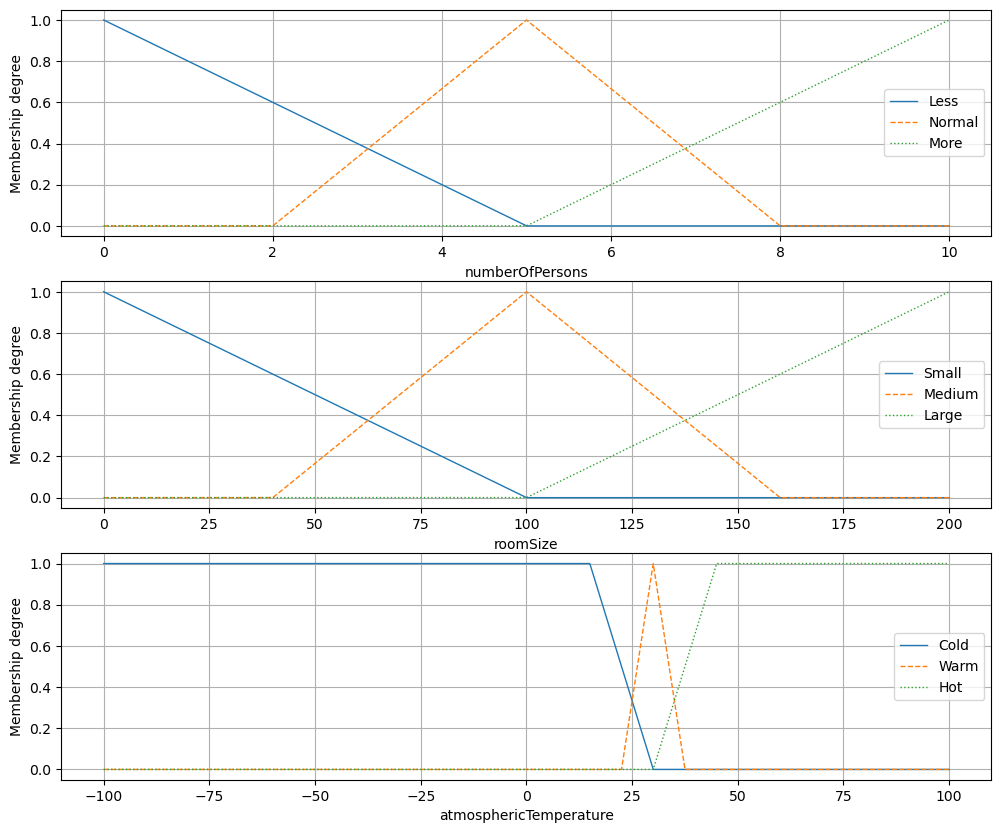

In [30]:
fig, axs = plt.subplots(3,1, figsize=(12,10))
for var_index, var_name in enumerate(list(FS._lvs.keys())[:3]):
    FS.plot_variable(var_name=var_name, ax=axs[var_index], outputfile=f"./images/{var_name}.png")
    axs[var_index].grid()

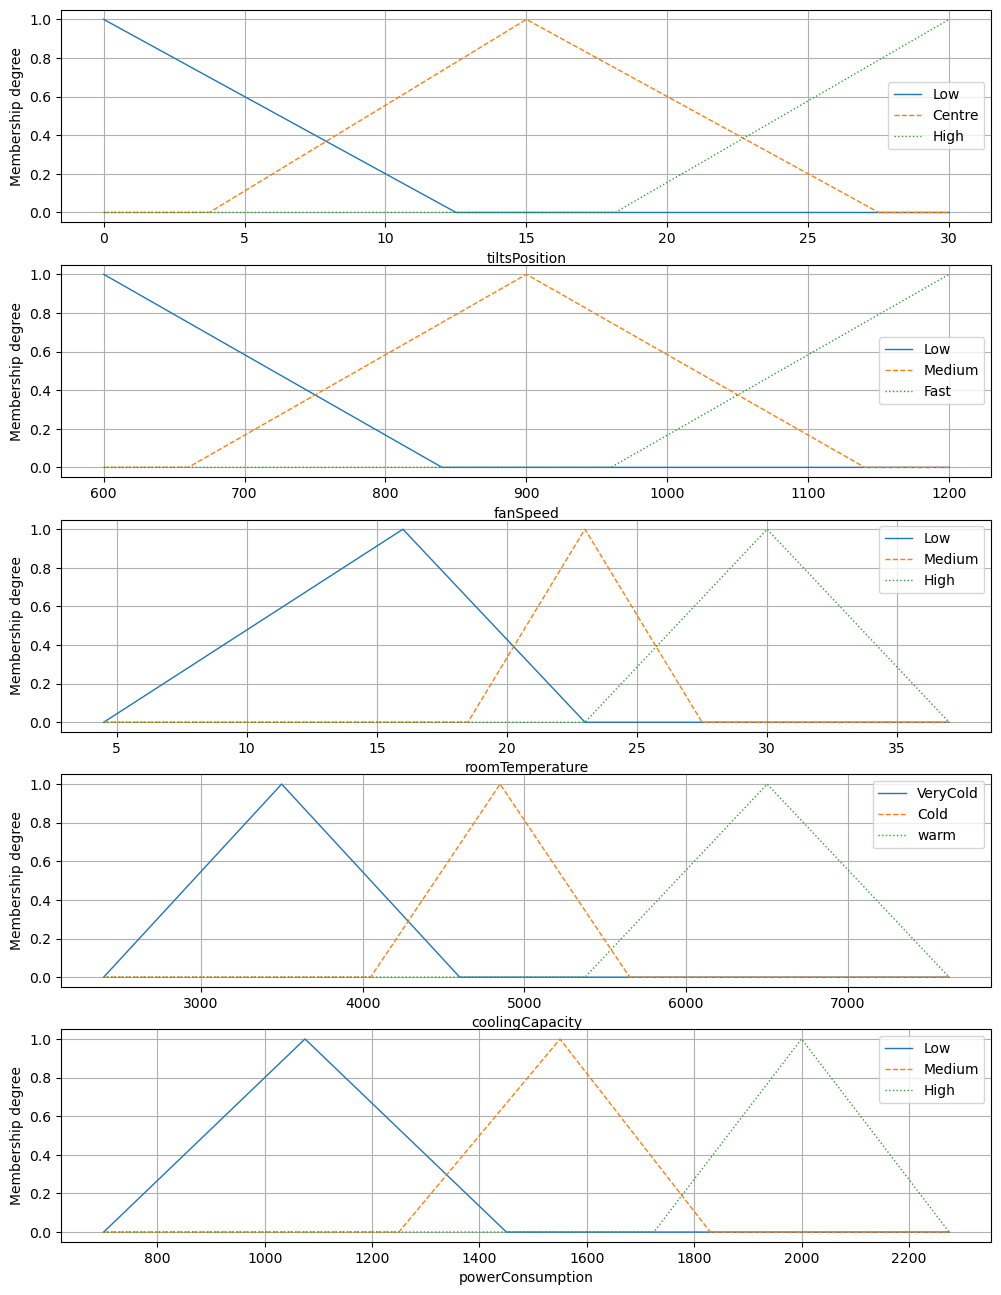

In [40]:
fig, axs = plt.subplots(5,1, figsize=(12,16))
for var_index, var_name in enumerate(list(FS._lvs.keys())[3:]):
    FS.plot_variable(var_name=var_name, ax=axs[var_index-3], outputfile=f"./images/{var_name}.png")
    axs[var_index-3].grid()

### Criação de regras

As regras devem seguir a a formatação abaixo:

"**IF** (Entrada_1 **IS** ruim) **AND** (Entrada_2 **IS** bom) **THEN** (Saida **IS** medio)"

In [94]:
regras = pd.read_csv("regras.csv")
regras.set_index("Numero", inplace=True)

In [95]:
regras.columns

Index(['NUMBEROFPERSON', 'ROOMSIZE', 'ATMOSSPHERICTEMPERATURE',
       'ROOMTEMPERATURE', 'COOLINGCAPACITY', 'POWERCONSUMPTION',
       'TILTSPOSITION', 'FANSPEED'],
      dtype='object')

In [96]:
for col in regras.columns:
    print(f'{col}: {regras[col].unique()}')

NUMBEROFPERSON: ['Less' 'Normal' 'More']
ROOMSIZE: ['Small' 'Medium' 'Large' 'Less' 'Normal' 'More']
ATMOSSPHERICTEMPERATURE: ['Cold' 'Warm' 'Hot']
ROOMTEMPERATURE: ['Low' 'Medium' 'High']
COOLINGCAPACITY: ['VeryCold' 'Cold' 'warm' 'Very cold']
POWERCONSUMPTION: ['Low' 'Medium' 'High']
TILTSPOSITION: ['Low' 'Centre' 'High']
FANSPEED: ['Low' 'Medium' 'Fast']


In [97]:
regras['COOLINGCAPACITY'] = regras['COOLINGCAPACITY'].apply(lambda x: x.replace("Verycold", "VeryCold")).replace('Very cold', "VeryCold")
regras['ROOMSIZE'] = regras['ROOMSIZE'].apply(lambda x: x.replace("Less", "Small")).apply(lambda x: x.replace("Normal", "Medium")).apply(lambda x: x.replace("More", "Large"))

In [98]:
dict_rules = dict()
for col in regras.columns:
    dict_rules[col] = regras[col].unique().tolist()
    print(f'{col}: {regras[col].unique()}')

NUMBEROFPERSON: ['Less' 'Normal' 'More']
ROOMSIZE: ['Small' 'Medium' 'Large']
ATMOSSPHERICTEMPERATURE: ['Cold' 'Warm' 'Hot']
ROOMTEMPERATURE: ['Low' 'Medium' 'High']
COOLINGCAPACITY: ['VeryCold' 'Cold' 'warm']
POWERCONSUMPTION: ['Low' 'Medium' 'High']
TILTSPOSITION: ['Low' 'Centre' 'High']
FANSPEED: ['Low' 'Medium' 'Fast']


In [99]:
rules = list()
rules_for_matlabt = list()
for i, row in regras.iterrows():
    # rules.append(
    #     f"IF (numberOfPersons IS {row['NUMBEROFPERSON']}) AND \
    #     (roomSize IS {row['ROOMSIZE']}) AND \
    #     (atmosphericTemperature IS {row['ATMOSSPHERICTEMPERATURE']}) THEN \
    #     (roomTemperature IS {row['ROOMTEMPERATURE']}) \
    #     (coolingCapacity IS {row['COOLINGCAPACITY']}) \
    #     (powerConsumption IS {row['POWERCONSUMPTION']}) \
    #     (tiltsPosition IS {row['TILTSPOSITION']}) \
    #     (fanSpeed IS {row['FANSPEED']})"
    # )
    rules_for_matlabt.append(
        f"{dict_rules['NUMBEROFPERSON'].index(row['NUMBEROFPERSON'])+1} {dict_rules['ROOMSIZE'].index(row['ROOMSIZE'])+1} {dict_rules['ATMOSSPHERICTEMPERATURE'].index(row['ATMOSSPHERICTEMPERATURE'])+1}, {dict_rules['ROOMTEMPERATURE'].index(row['ROOMTEMPERATURE'])+1} {dict_rules['COOLINGCAPACITY'].index(row['COOLINGCAPACITY'])+1} {dict_rules['POWERCONSUMPTION'].index(row['POWERCONSUMPTION'])+1} {dict_rules['TILTSPOSITION'].index(row['TILTSPOSITION'])+1} {dict_rules['FANSPEED'].index(row['FANSPEED'])+1} (1) : 1"
    )
# FS.add_rules(rules)

In [100]:
rules_for_matlabt

['1 1 1, 1 1 1 1 1 (1) : 1',
 '1 2 2, 2 2 2 2 2 (1) : 1',
 '1 3 3, 3 3 3 3 3 (1) : 1',
 '2 1 1, 1 1 1 1 1 (1) : 1',
 '2 2 2, 2 2 2 2 2 (1) : 1',
 '2 3 3, 3 3 3 3 3 (1) : 1',
 '3 1 1, 1 1 1 1 1 (1) : 1',
 '3 2 2, 2 2 2 2 2 (1) : 1',
 '3 3 3, 3 3 3 3 3 (1) : 1',
 '1 1 1, 1 1 1 1 1 (1) : 1',
 '2 1 2, 2 2 2 2 2 (1) : 1',
 '3 1 3, 3 3 3 3 3 (1) : 1',
 '1 2 1, 1 1 1 1 1 (1) : 1',
 '2 2 2, 2 2 2 2 2 (1) : 1',
 '3 2 3, 3 3 3 3 3 (1) : 1',
 '1 3 1, 1 1 1 1 1 (1) : 1',
 '2 3 2, 2 2 2 2 2 (1) : 1',
 '3 3 3, 3 3 3 3 3 (1) : 1',
 '1 1 1, 1 1 1 1 1 (1) : 1',
 '2 2 1, 2 2 2 2 2 (1) : 1',
 '3 3 1, 3 3 3 3 3 (1) : 1',
 '1 1 2, 1 1 1 1 1 (1) : 1',
 '2 2 2, 2 2 2 2 2 (1) : 1',
 '3 3 2, 3 3 3 3 3 (1) : 1',
 '1 1 3, 1 1 1 1 1 (1) : 1',
 '2 2 3, 2 2 2 2 2 (1) : 1',
 '3 3 3, 3 3 3 3 3 (1) : 1']

In [93]:
len(rules_for_matlabt)

27

In [72]:
len(FS._rules)

27

In [73]:
len(rules)

27

### Superfície Fuzzy

In [74]:
FS.plot_surface(variables=list(FS._lvs.keys())[:2], output='roomTemperature')

ValueError: could not convert string to float: 'coolingCapacity'

In [52]:
FS._lvs.keys()

odict_keys(['numberOfPersons', 'roomSize', 'atmosphericTemperature', 'roomTemperature', 'coolingCapacity', 'powerConsumption', 'tiltsPosition', 'fanSpeed'])

In [77]:
X_room_size = np.arange(0, 100, 1)
X_len = len(X_room_size)
Y_number_person = np.arange(0, 10, 1)
Y_len = len(Y_number_person)

Z_decisao = np.zeros((X_len, Y_len))
Z_len = len(Z_decisao)

# Loop para calcular os valores de z
for i in range(X_len):
    for j in range(Y_len):
        print(type(X_room_size[i]), type(Y_number_person[j]))
        # for k in range(Z_len):
        FS.set_variable('roomSize', X_room_size[i])
        FS.set_variable('numberOfPersons', Y_number_person[j])
        # FS.set_variable('atmosphericTemperature', Z_temo[k])
        Z_decisao[i, j] = FS.Mamdani_inference(terms=['roomTemperature'], ignore_errors=True)

<class 'numpy.int64'> <class 'numpy.int64'>


ValueError: could not convert string to float: 'coolingCapacity'

ValueError: Argument Z must be 2-dimensional.

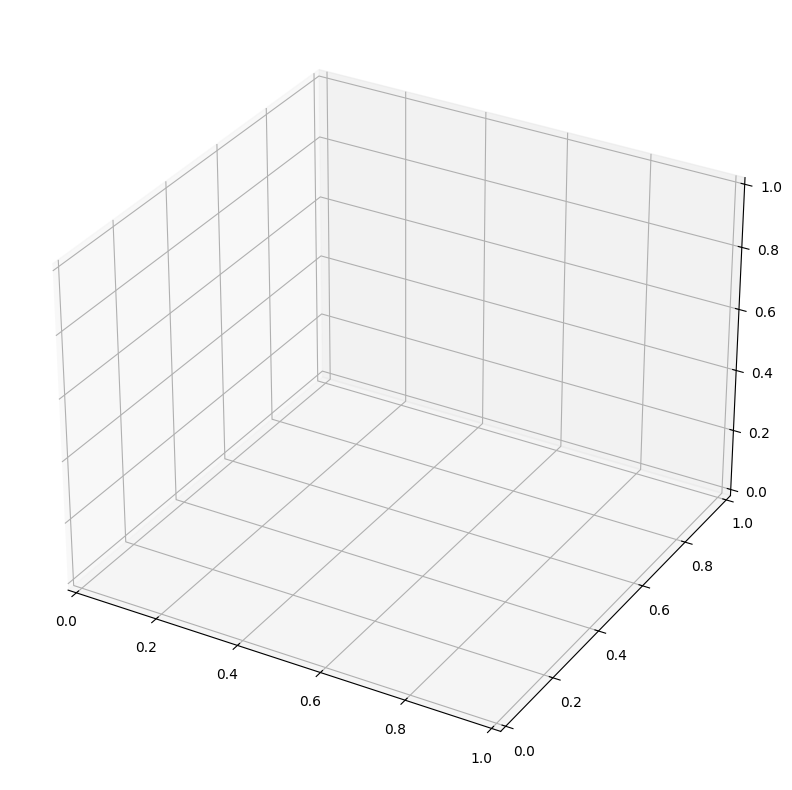

In [76]:
X, Y = np.meshgrid(X_room_size, Y_number_person)
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z_decisao.T, cmap='magma')

ax.set_xlabel('Tamanho_Quarto')
ax.set_ylabel('Numero_Pessoas')
ax.set_zlabel('Temperatura_Quarto')

plt.title('Superfície Fuzzy')
plt.tight_layout()
ax.view_init(azim=-30, elev=20)

plt.show()